<a href="https://colab.research.google.com/github/fnsalamaa/FINA-SALAMA-PCVK/blob/main/Week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**✩˚｡⋆ WEEK 6 PCVK ✩˚｡⋆**

### Name : Fina Salama Qowlam Hareny

#### No    : 08 / 2141720164

####Class : TI-3I

----
##**⋰˚☆ MODULE 6 ⋰˚☆**
Histogram, Histogram Equalization, Dithering


In [1]:
from google.colab import drive

# Acessing Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import the following libraries that will be used during the following week 6 practicum
trial.

In [2]:
# Import necessary libraries
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. Make an image histogram like the following histogram output based on the flowchart below :
(Use image lena.jpg)

<BarContainer object of 256 artists>

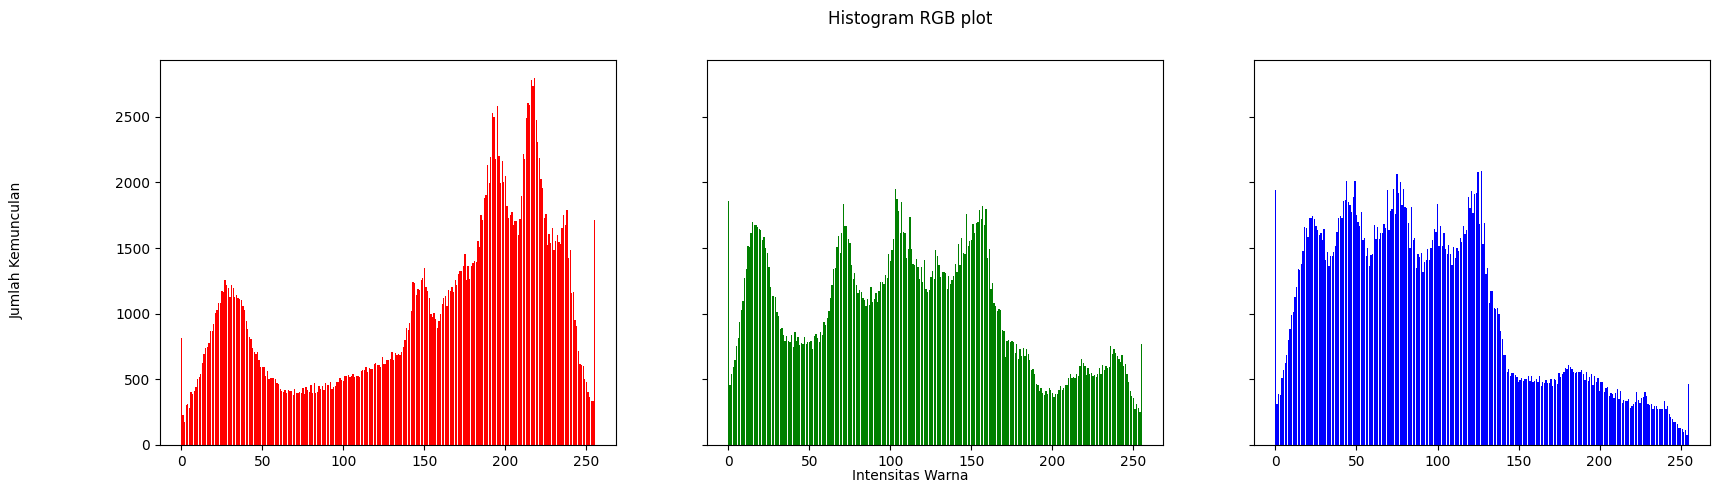

In [4]:
# Load the Lena image
img = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')

height, width, depth = np.shape(img)
names = np.arange(256)

blue = [0]*256
green = [0]*256
red = [0]*256

for y in range(0,height):
  for x in range(0,width):
    blue[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    red[img[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

4. After working on question no. 3, make the same image histogram but use the library
that is owned by NumPy, namely " histogram ". Compare the results. Does the
output appear the same?

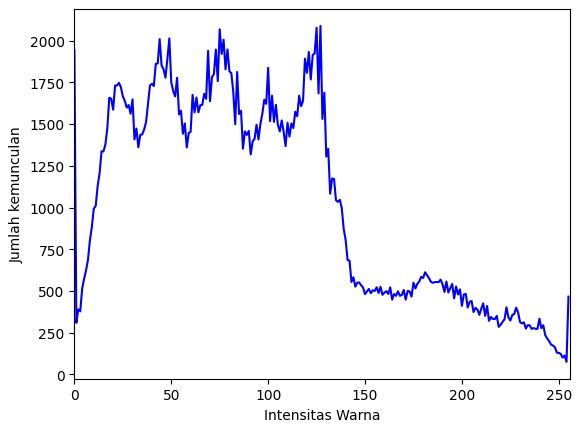

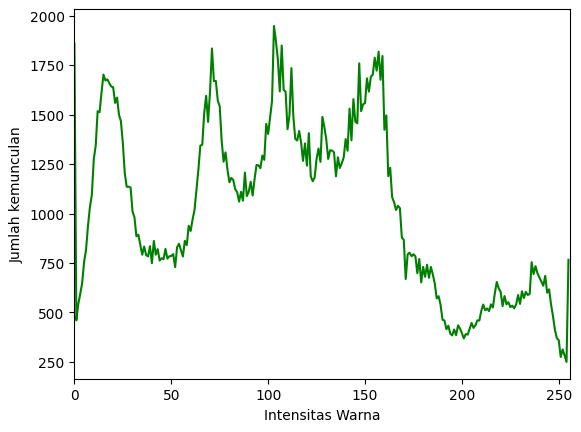

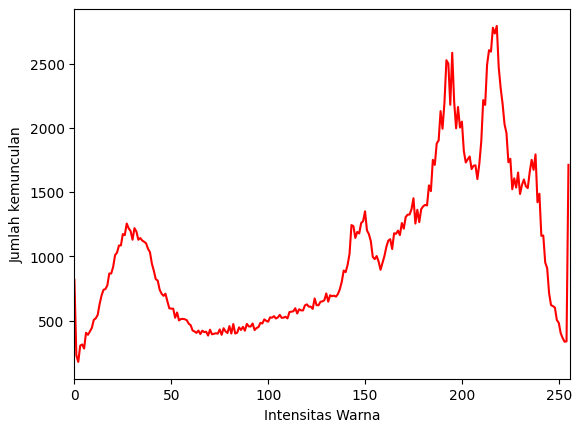

In [5]:
# Load the Lena image
img = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')

colors = ('b','g','r')
channel_ids = (0, 1, 2)

for channel_id, c in zip(channel_ids, colors):
  histogram, bin_edges = np.histogram(
      img[:, :, channel_id], bins=256, range =(0,256)
  )
  plt.xlim([0,256])
  plt.plot(bin_edges[0:-1], histogram, color=c)

  plt.xlabel("Intensitas Warna")
  plt.ylabel("Jumlah kemunculan")

  plt.show()

5. Make an image histogram such as the output equalization histogram and also the
image display before and after the following equalization histogram process based on
the flowchart below : (Use image lena_lc .jpg)

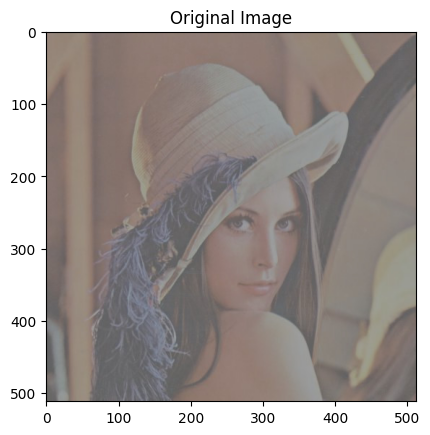

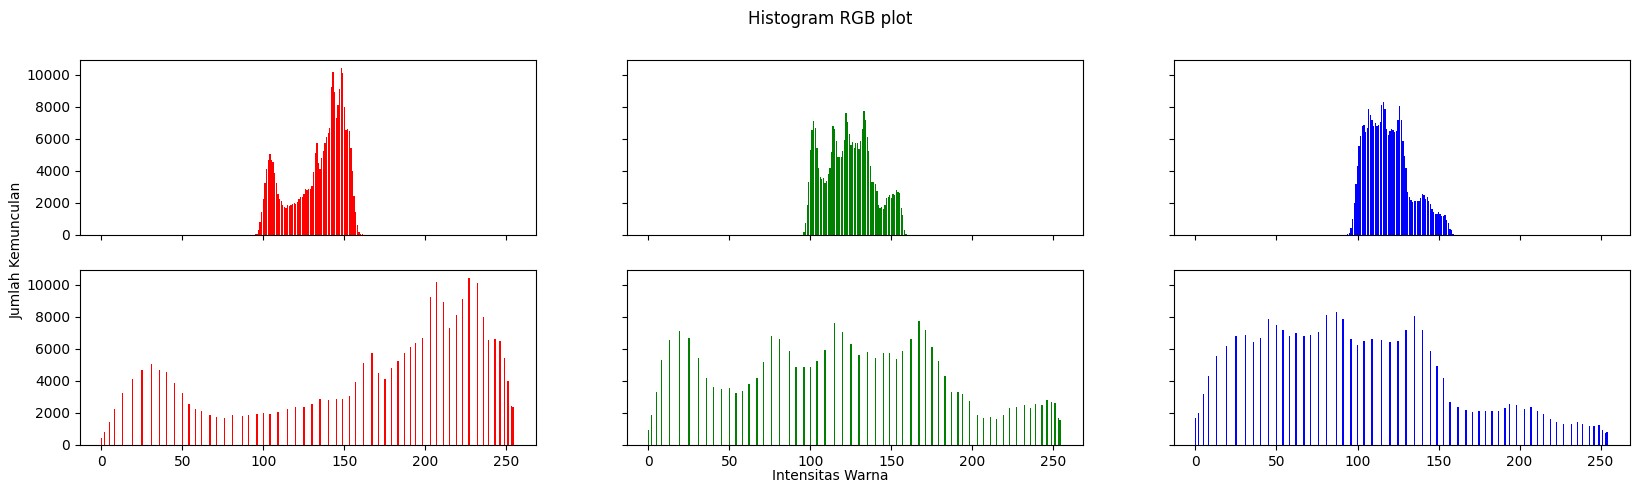

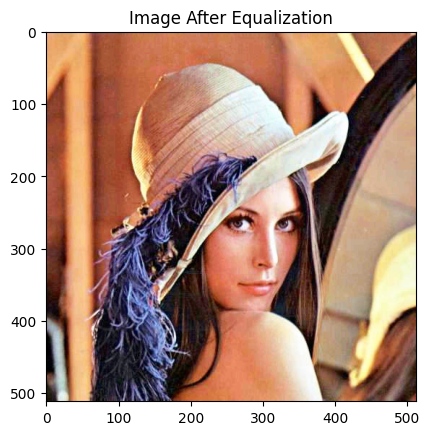

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the histogram
def histog(img1):
    height, width, depth = np.shape(img1)
    ax = np.zeros((3, 256))
    for y in range(0, height):
        for x in range(0, width):
            ax[0][img1[y][x][0]] += 1
            ax[1][img1[y][x][1]] += 1
            ax[2][img1[y][x][2]] += 1
    return ax

# Load the original image
img1 = cv2.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg')

# Display the original image
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

histo_asli = histog(img1)

# Convert to Numpy array
img_array = np.asarray(img1)

# Flatten image array and calculate histogram via binning
histogram_array = np.bincount(img_array.flatten(), minlength=256)

# Normalize
num_pixels = np.sum(histogram_array)
histogram_array = histogram_array / num_pixels

# Normalized cumulative histogram
chistogram_array = np.cumsum(histogram_array)

# Pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array).astype(np.uint8)

# Transformation
# Flatten image array into list
img_list = list(img_array.flatten())

# Transform pixel values to equalize
eq_img_list = [transform_map[p] for p in img_list]

# Reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

equal_histo = histog(img2)

# Plot histograms before and after equalization
fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

names = np.arange(256)

axs[0, 0].bar(names, histo_asli[2], color='red')
axs[0, 1].bar(names, histo_asli[1], color='green')
axs[0, 2].bar(names, histo_asli[0], color='blue')
axs[1, 0].bar(names, equal_histo[2], color='red')
axs[1, 1].bar(names, equal_histo[1], color='green')
axs[1, 2].bar(names, equal_histo[0], color='blue')

plt.show()

# Display the image after equalization
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('Image After Equalization')
plt.show()

6. After working on question no. 5, make the same image histogram but use the library
owned by CV2, namely " equalizeHist ". Compare the results. Does the output
appear the same?

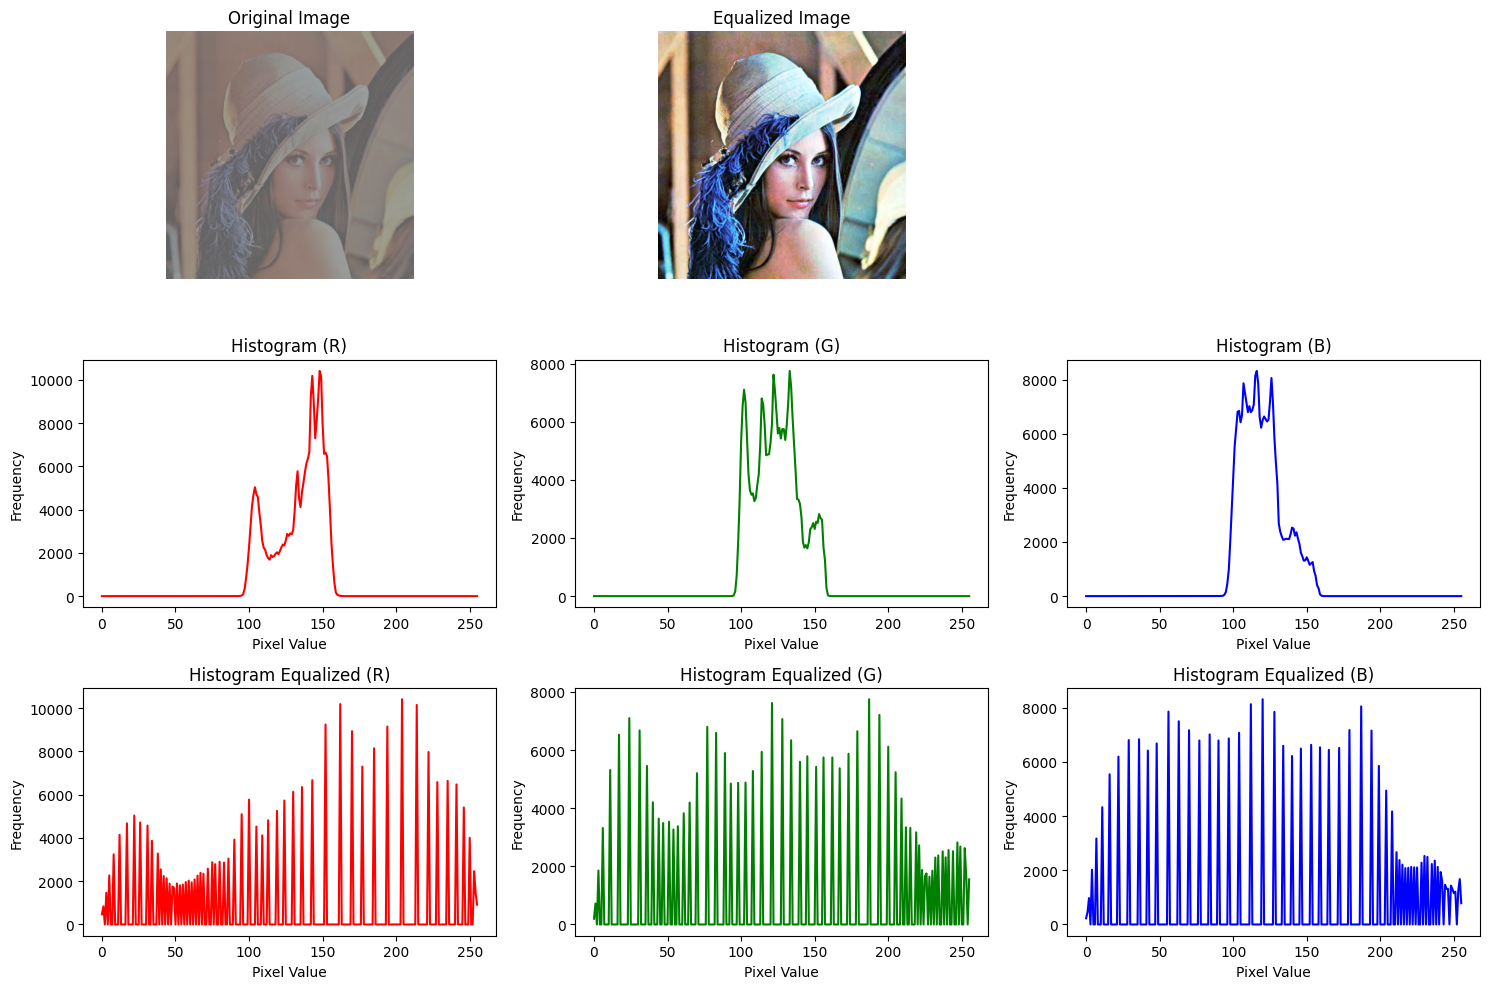

In [14]:
# Load the Lena image
img = cv.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg')

# Convert the image to RGB (OpenCV loads images in BGR)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Split the image into R, G, B channels
r, g, b = cv.split(img_rgb)

# Apply histogram equalization to each channel
r_equalized = cv.equalizeHist(r)
g_equalized = cv.equalizeHist(g)
b_equalized = cv.equalizeHist(b)

# Merge the equalized channels back into an RGB image
equalized_img = cv.merge([r_equalized, g_equalized, b_equalized])

# Calculate histograms for original and equalized images
hist_r_original = cv.calcHist([r], [0], None, [256], [0, 256])
hist_g_original = cv.calcHist([g], [0], None, [256], [0, 256])
hist_b_original = cv.calcHist([b], [0], None, [256], [0, 256])

hist_r_equalized = cv.calcHist([r_equalized], [0], None, [256], [0, 256])
hist_g_equalized = cv.calcHist([g_equalized], [0], None, [256], [0, 256])
hist_b_equalized = cv.calcHist([b_equalized], [0], None, [256], [0, 256])

# Plot the original image and equalized image
plt.figure(figsize=(15, 10))

# Original Image
plt.subplot(3, 3, 1)
plt.imshow(img_rgb)
plt.axis('off')
plt.title('Original Image')

# Equalized Image
plt.subplot(3, 3, 2)
plt.imshow(equalized_img)
plt.axis('off')
plt.title('Equalized Image')

# Plot original image histograms
plt.subplot(3, 3, 4)
plt.plot(hist_r_original, color='red')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram (R)')

plt.subplot(3, 3, 5)
plt.plot(hist_g_original, color='green')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram (G)')

plt.subplot(3, 3, 6)
plt.plot(hist_b_original, color='blue')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram (B)')

# Plot equalized image histograms
plt.subplot(3, 3, 7)
plt.plot(hist_r_equalized, color='red')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram Equalized (R)')

plt.subplot(3, 3, 8)
plt.plot(hist_g_equalized, color='green')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram Equalized (G)')

plt.subplot(3, 3, 9)
plt.plot(hist_b_equalized, color='blue')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram Equalized (B)')

plt.tight_layout()
plt.show()

7. Do the mapping process of 16 million RGB colors into just 8 colors, namely black,
green, yellow, blue, cyan, magenta, white as shown in the following output based on
the flowchart below! (Use the image testlena .jpg)

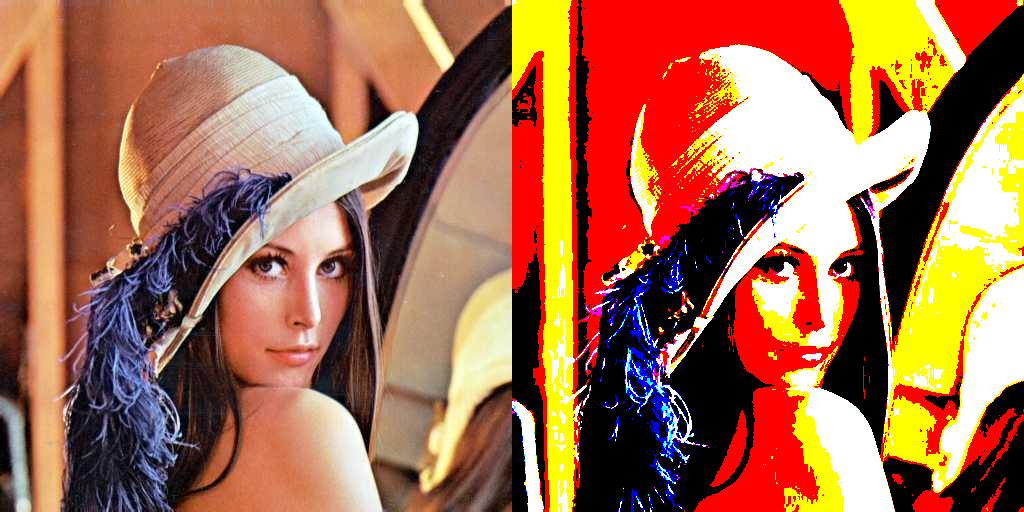

True

In [16]:
def closest (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  palletteColor = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(palletteColor)):
    rDiff = r - palletteColor[i][0]
    gDiff = g - palletteColor[i][1]
    bDiff = b - palletteColor[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

palletteColor = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')
imgx = cv.cvtColor(img, cv.COLOR_BGR2RGB)
imgy = np.zeros(imgx.shape, imgx.dtype)

for y in range(0, imgx.shape[0]):
  for x in range(0, imgx.shape[1]):
    new = closest(imgx[y, x, 0], imgx[y, x, 1], imgx[y, x, 2])
    imgy[y, x] = palletteColor[new]

imgx = cv.cvtColor(imgx, cv.COLOR_BGR2RGB)
imgy = cv.cvtColor(imgy, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((imgx, imgy))
cv2_imshow(final_frame)
cv.imwrite('/content/drive/MyDrive/PCVK/testlena.jpg', imgy)

8. Do the Floyd and Steinberg dithering process like the following output (initial image
display, and after dithering display) based on the flowchart below! (Use wiki.jpg
image)

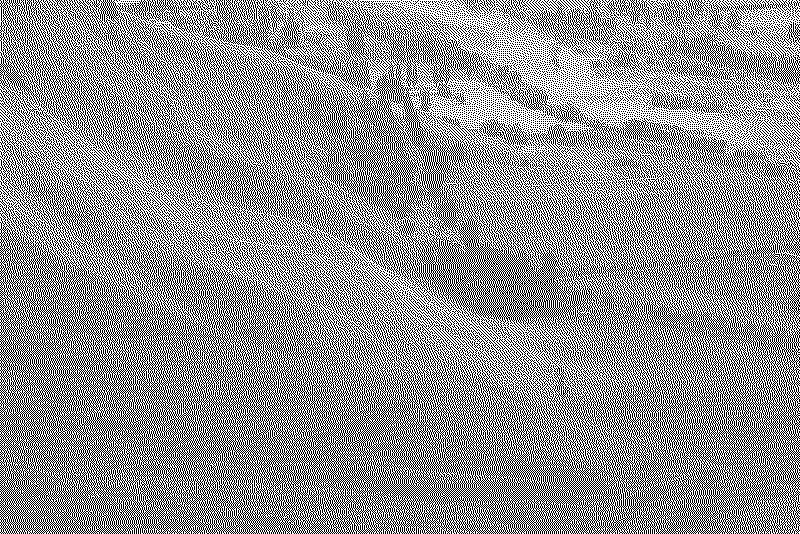

In [23]:
from PIL import Image
import cv2
import numpy as np

imageConvert = Image.open('/content/drive/MyDrive/PCVK/wiki.jpg').convert(mode='1', dither=Image.FLOYDSTEINBERG)

Image = cv2.imread('/content/drive/MyDrive/PCVK/wiki.jpg')

GrayImage = cv2.cvtColor(Image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('/content/drive/MyDrive/PCVK/wiki.jpg', GrayImage)

Height = GrayImage.shape[0]
Width = GrayImage.shape[1]

for y in range(0, Height):
    for x in range(0, Width):
        old_value = GrayImage[y, x]
        new_value = 0
        if (old_value > 128):
            new_value = 255

        GrayImage[y, x] = new_value

        Error = old_value - new_value

        if (x < Width - 1):
            NewNumber = GrayImage[y, x + 1] + Error * 7 // 16
            if (NewNumber > 255):
                NewNumber = 255
            elif (NewNumber < 0):
                NewNumber = 0
            GrayImage[y, x + 1] = NewNumber

        if (x > 0 and y < Height - 1):
            NewNumber = GrayImage[y + 1, x - 1] + Error * 3 // 16
            if (NewNumber > 255):
                NewNumber = 255
            elif (NewNumber < 0):
                NewNumber = 0
            GrayImage[y + 1, x - 1] = NewNumber

        if (y < Height - 1):
            NewNumber = GrayImage[y + 1, x] + Error * 5 // 16
            if (NewNumber > 255):
                NewNumber = 255
            elif (NewNumber < 0):
                NewNumber = 0
            GrayImage[y + 1, x] = NewNumber

        if (x < Width - 1 and y < Height - 1):
            NewNumber = GrayImage[y + 1, x + 1] + Error * 1 // 16
            if (NewNumber > 255):
                NewNumber = 255
            elif (NewNumber < 0):
                NewNumber = 0
            GrayImage[y + 1, x + 1] = NewNumber

cv2.imwrite('/content/drive/MyDrive/PCVK/wiki.jpg', GrayImage)
cv2_imshow(GrayImage)